In [1]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset"

In [3]:
h_x = np.load(dir_path + "/healty_x.npy", allow_pickle= True)
h_y = np.load(dir_path + "/healty_z.npy", allow_pickle= True)
h_z = np.load(dir_path + "/healty_y.npy", allow_pickle= True)

In [4]:
d_x = np.load(dir_path + "/diseased_x.npy", allow_pickle= True)
d_y = np.load(dir_path + "/diseased_z.npy", allow_pickle= True)
d_z = np.load(dir_path + "/diseased_y.npy", allow_pickle= True)

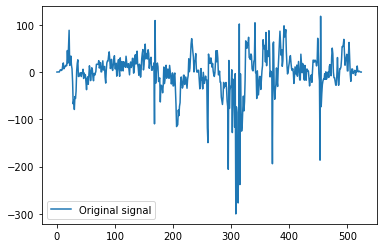

In [5]:
plt.plot(h_x[0])
plt.legend(['Original signal'])

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


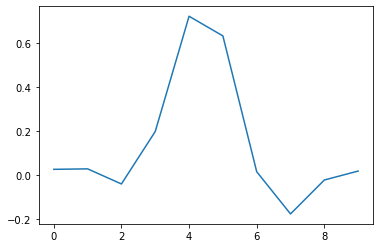

In [6]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(h_x[0], w, level=6)

In [7]:
#coeffs =np.array(coeffs)

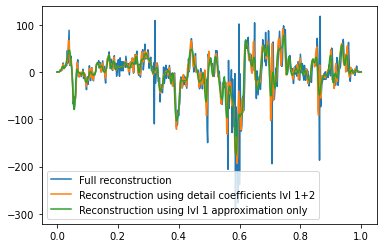

In [8]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

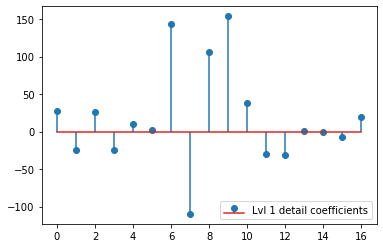

In [9]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])


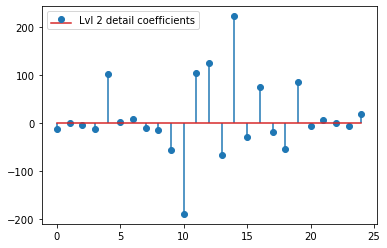

In [10]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


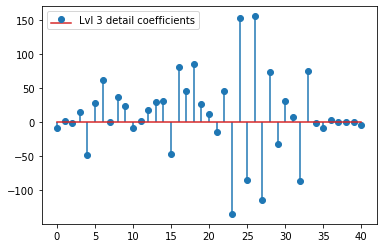

In [11]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


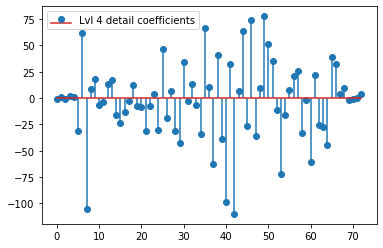

In [12]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


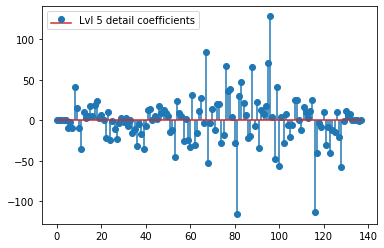

In [13]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


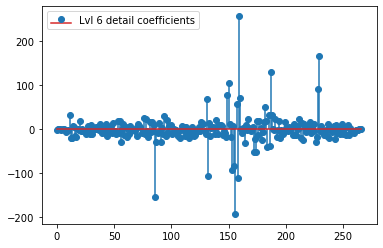

In [14]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [19]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, 525), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = h_x[0] - approx_lvl1_interp

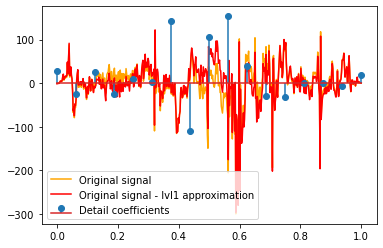

In [20]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(h_x[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [21]:
coef_h_x, coef_h_y, coef_h_z = [], [], []
for i in range(len(h_x)):
    coef_h_x.append(pywt.wavedec(h_x[i], w, level=6))
    coef_h_y.append(pywt.wavedec(h_y[i], w, level=6))
    coef_h_z.append(pywt.wavedec(h_z[i], w, level=6))
    

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [22]:
coef_d_x, coef_d_y, coef_d_z = [], [], []
for i in range(len(d_x)):
    coef_d_x.append(pywt.wavedec(d_x[i], w, level=6))
    coef_d_y.append(pywt.wavedec(d_y[i], w, level=6))
    coef_d_z.append(pywt.wavedec(d_z[i], w, level=6))

In [23]:
coef_h_x = np.array(coef_h_x)

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_97682/532172135.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coef_h_x = np.array(coef_h_x)


In [34]:
coef_d_x = np.array(coef_d_x)

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_97682/702499328.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coef_d_x = np.array(coef_d_x)


In [32]:
coef_h_x[:,0][0].shape

(17,)

In [38]:
for i in range(73):
    print(coef_h_x[:,0][i].shape)

(17,)
(18,)
(21,)
(15,)
(15,)
(15,)
(14,)
(19,)
(19,)
(17,)
(13,)
(18,)
(14,)
(14,)
(17,)
(17,)
(15,)
(14,)
(13,)
(16,)
(19,)
(14,)
(15,)
(18,)
(18,)
(14,)
(15,)
(14,)
(18,)
(18,)
(17,)
(24,)
(14,)
(14,)
(19,)
(16,)
(13,)
(19,)
(16,)
(17,)
(16,)
(16,)
(16,)
(13,)
(15,)
(16,)
(21,)
(22,)
(17,)
(18,)
(12,)
(14,)
(18,)
(14,)
(16,)
(14,)
(20,)
(15,)
(16,)
(14,)
(13,)
(15,)
(25,)
(18,)
(17,)
(14,)
(17,)
(20,)
(16,)
(17,)
(15,)
(14,)
(18,)


In [27]:
for i in range(7):
    print(coef_h_x[0][i].shape)

(17,)
(17,)
(25,)
(41,)
(73,)
(138,)
(267,)


In [36]:
for i in range(7):
    print(coef_d_x[0][i].shape)

(16,)
(16,)
(24,)
(40,)
(72,)
(136,)
(263,)


In [28]:
from scipy.stats import mannwhitneyu

In [35]:
mannwhitneyu(coef_h_x[:,0], coef_d_x[:,0], use_continuity=False, alternative = 'two-sided')

ValueError: operands could not be broadcast together with shapes (17,) (18,) 

In [ ]:
coef_h_x[i][0]